In [1]:
import shap
from sklearn.model_selection import train_test_split


X,y=shap.datasets.boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

X_train[:10]


Bad key "text.kerning_factor" on line 4 in
c:\users\jh\.conda\envs\ispin\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


Text(0, 0.5, 'MEDV \n Price $1,000')

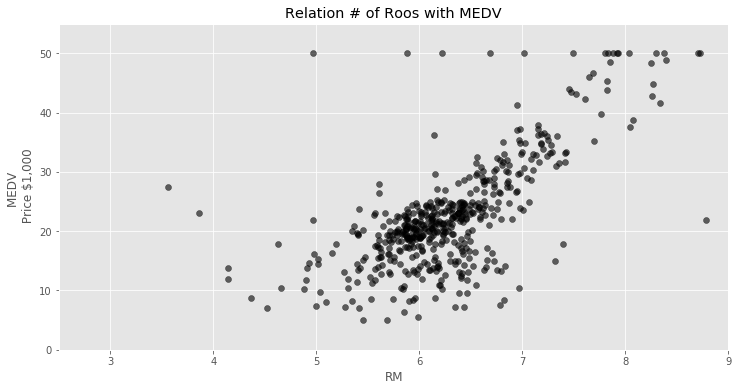

In [2]:
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

fig,ax1=plt.subplots(1,1,figsize=(12,6))

ax1.scatter(X['RM'],y,color='black',alpha=0.6)

ax1.set_title('Relation # of Roos with MEDV')
ax1.set_xlim(2.5,9)
ax1.set_xlabel('RM')
ax1.set_ylim(0,55)
ax1.set_ylabel('MEDV \n Price $1,000')

In [3]:
from sklearn import linear_model
import pandas as pd

linear_regression=linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']),y=y_train)
prediction=linear_regression.predict(X=pd.DataFrame(X_test['RM']))

print('a value: ',linear_regression.intercept_)
print('b value: ',linear_regression.coef_)
print('MEDV = {:.2f} * RM {:.2f}'.format(linear_regression.coef_[0],
                                        linear_regression.intercept_))

a value:  -32.39552264560753
b value:  [8.76050748]
MEDV = 8.76 * RM -32.40


Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


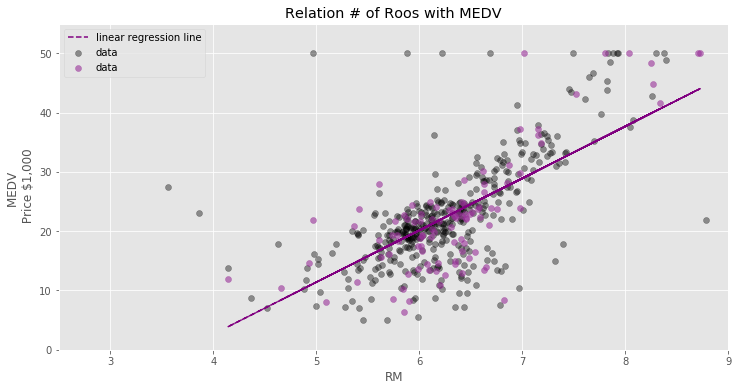

In [4]:
fig,ax1=plt.subplots(1,1,figsize=(12,6))

ax1.scatter(X_train['RM'],y_train,color='black',alpha=0.4,label='data')
ax1.scatter(X_test['RM'],y_test,color='#993299',alpha=0.6,label='data')

ax1.set_title('Relation # of Roos with MEDV')
ax1.set_xlim(2.5,9)
ax1.set_xlabel('RM')
ax1.set_ylim(0,55)
ax1.set_ylabel('MEDV \n Price $1,000')

ax1.plot(X_test['RM'],prediction,color='purple',alpha=1,
               linestyle='--',label='linear regression line')

ax1.legend()

In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse=np.sqrt(mean_squared_error(y_test,prediction,squared=False))

print("RMSE: %f" % (rmse))

RMSE: 2.526487


In [6]:
import xgboost

model=xgboost.XGBRegressor(objective='reg:linear')
model.fit(X_train,y_train)

preds=model.predict(X_test)

In [7]:
rmse=np.sqrt(mean_squared_error(y_test,preds))
print('RMSE: %f' %(rmse))

RMSE: 2.818447


In [8]:
shap.initjs()

explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_train)

In [9]:
shap.force_plot(explainer.expected_value,shap_values[0,:],X_train.iloc[0,:])

Text(0, 0.5, 'MEDV \n Price $1,000')

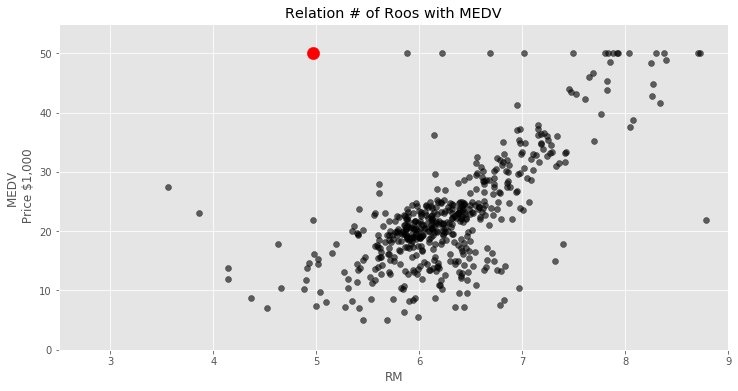

In [10]:
fig,ax1=plt.subplots(1,1,figsize=(12,6))
idx=259
ax1.scatter(X['RM'],y,color='black',alpha=0.6)
ax1.scatter(X_train['RM'].iloc[idx],y_train[idx],color='red',s=150)

ax1.set_title('Relation # of Roos with MEDV')
ax1.set_xlim(2.5,9)
ax1.set_xlabel('RM')
ax1.set_ylim(0,55)
ax1.set_ylabel('MEDV \n Price $1,000')


In [11]:
shap.force_plot(explainer.expected_value,shap_values[259,:],X_train.iloc[259,:])

In [12]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

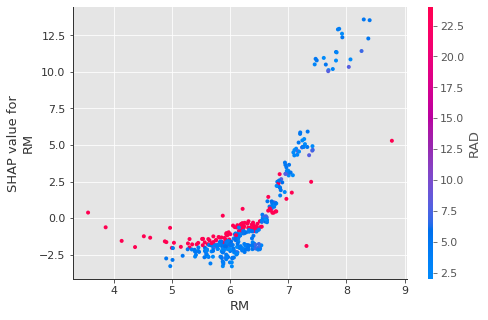

In [13]:
shap.dependence_plot('RM',shap_values,X_train)

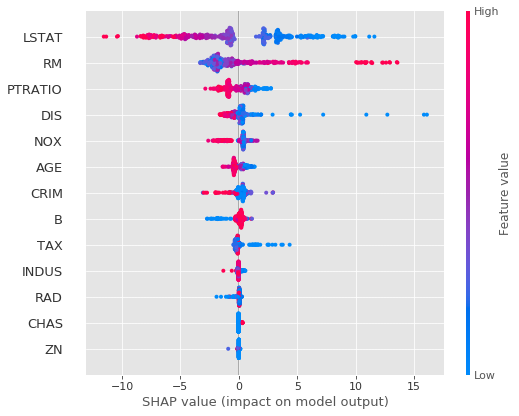

In [14]:
shap.summary_plot(shap_values,X_train)

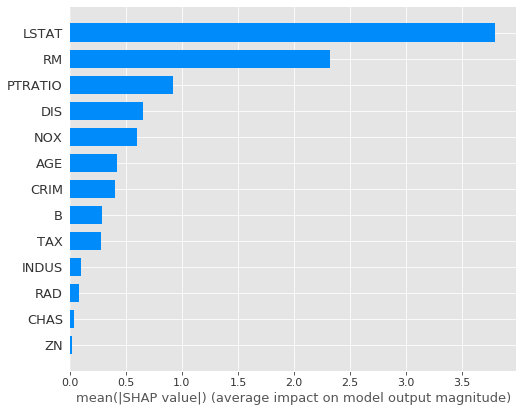

In [15]:
shap.summary_plot(shap_values,X_train,plot_type="bar")

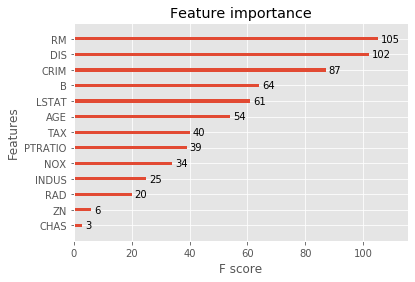

In [16]:
xgboost.plot_importance(model)

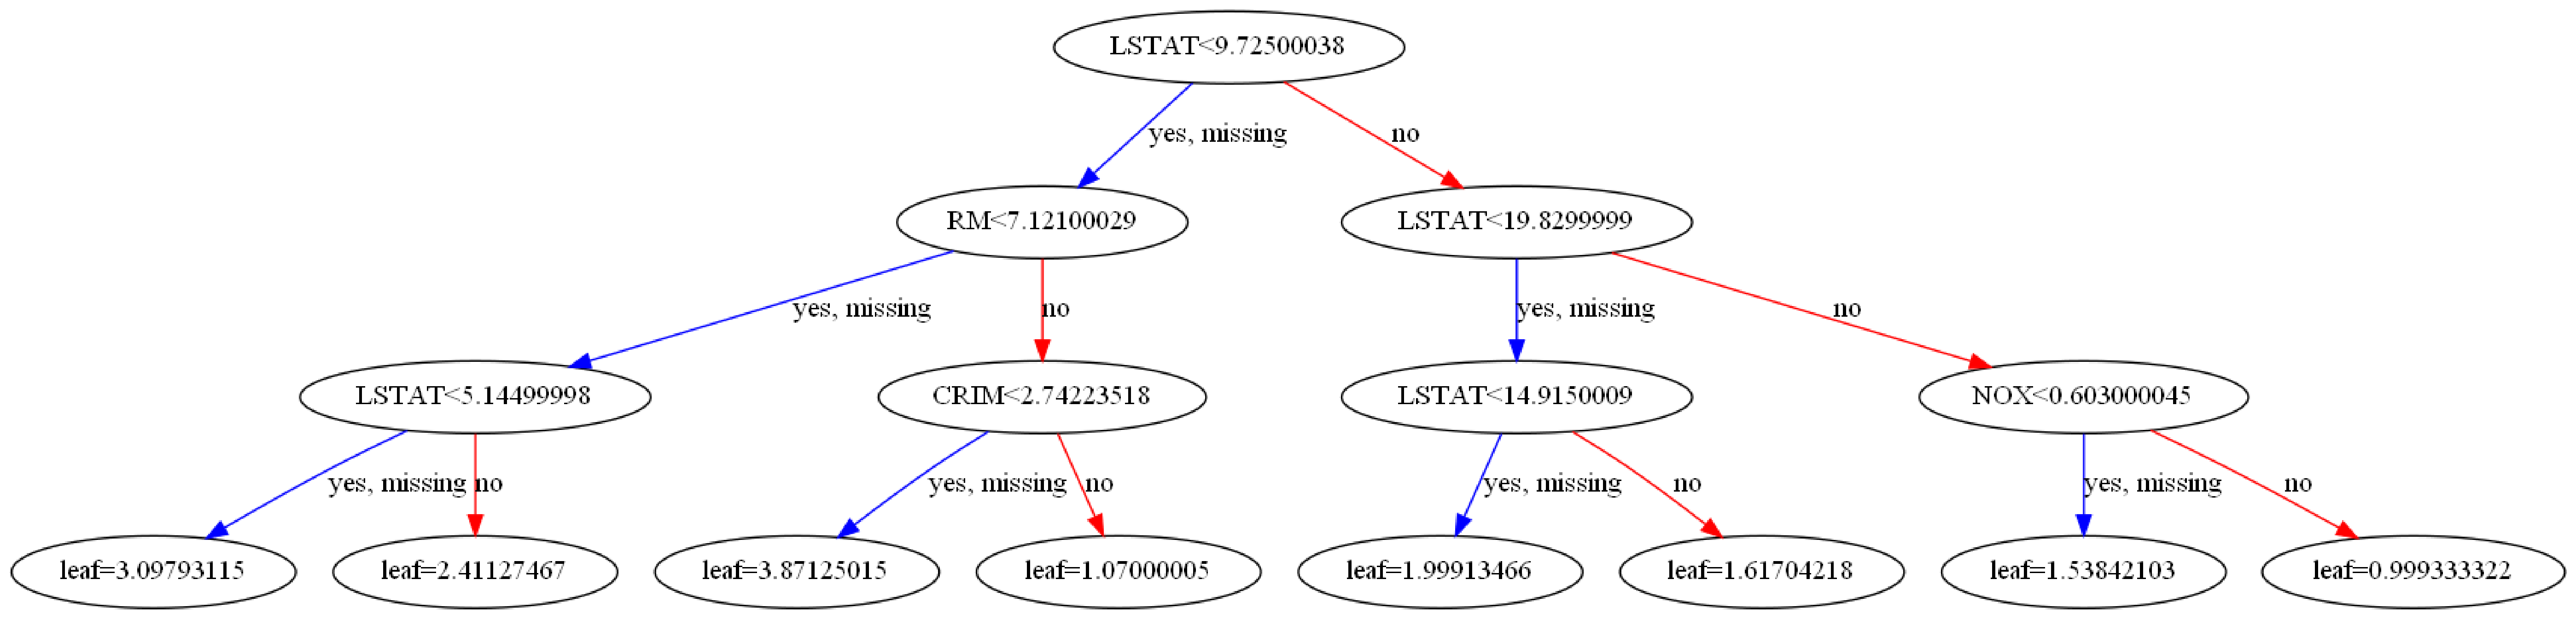

In [17]:
%matplotlib inline
import os

os.environ["PATH"]+=(os.pathsep+'C:/Program Files/Graphviz/bin/')

from xgboost import plot_tree

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=100,200

plot_tree(model)
plt.show()